# Predicting Parkinson's Disease
This notebook uses the dataset from [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Parkinson%27s+Disease+Classification) and classification models to predict whether a patient has Parkinson's Disease, with a focus on Logistic Regression.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Preparation

In [2]:
df = pd.read_csv('C:/Users/byron/Documents/GitHub/project-parkinsons-disease-classification/data/pd_speech_features.csv', 
                 header=1)

In [3]:
df.shape

(756, 755)

In [4]:
df.head(10)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
5,1,0,0.50780,0.78744,0.65451,226,221,0.007631,0.002696,0.00783,...,4.8025,5.0734,7.0166,5.9966,5.2065,7.4246,3.4153,3.5046,3.2250,1
6,2,1,0.76095,0.62145,0.54543,322,321,0.005991,0.000107,0.00222,...,117.2678,75.3156,32.0478,7.7060,3.1060,4.6206,12.8353,13.8300,7.7693,1
7,2,1,0.83671,0.62079,0.51179,318,317,0.006074,0.000136,0.00282,...,3.8564,11.8909,7.2891,4.3682,3.6443,5.9610,11.7552,18.0927,5.0448,1
8,2,1,0.80826,0.61766,0.50447,318,317,0.006057,0.000069,0.00161,...,2.2640,6.3993,4.4165,4.2662,3.6357,3.7346,2.9394,3.6216,3.8430,1
9,3,0,0.85302,0.62247,0.54855,493,492,0.003910,0.000040,0.00075,...,1.6796,2.0474,2.8117,3.5070,3.2727,3.8415,3.9439,5.8807,38.7211,1


In [5]:
df.id.nunique()

252

In [6]:
print('Summary of attribute datatypes:\n', df.dtypes.value_counts(), sep="")

Summary of attribute datatypes:
float64    749
int64        6
dtype: int64


In [7]:
print("Number of null values:", df.isnull().sum().sum())

Number of null values: 0


The data consists of 3 records for each patient, and all the columns, except for gender, seem to be numeric. Therefore, gender will be transformed into categorical variable, and mean value of the rest attributes will be calculated by id (patient).

In [8]:
df_mean = df.groupby(['id']).mean()
df_mean.gender = df_mean.gender.astype('category')
df_mean.head()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.823387,0.696370,0.567250,235.333333,234.333333,0.008220,0.000073,0.001963,0.000016,...,1.561733,2.862000,12.293333,9.717500,9.055300,6.259100,4.021533,4.164333,22.961700,1.0
1,0.0,0.415637,0.793993,0.592453,213.333333,211.000000,0.008884,0.001849,0.005790,0.000050,...,4.918567,4.827133,6.117633,8.599667,5.737233,7.933133,5.490533,4.941833,4.467233,1.0
2,1.0,0.801973,0.619967,0.520563,319.333333,318.333333,0.006041,0.000104,0.002217,0.000013,...,41.129400,31.201933,14.584467,5.446800,3.462000,4.772067,9.176633,11.848100,5.552367,1.0
3,0.0,0.828707,0.626097,0.537183,493.000000,492.000000,0.003913,0.000042,0.000757,0.000003,...,1.677633,1.908400,2.842167,3.493867,3.282433,3.085267,3.184433,4.032933,22.773633,1.0
4,0.0,0.831287,0.779397,0.726717,362.666667,361.666667,0.005622,0.002023,0.003593,0.000021,...,4.104600,4.285233,2.953200,2.799933,2.645100,2.811367,7.268333,13.338833,63.766900,1.0


## Base Model
The following classification models are used to get baseline performance:
- Logistic Regression
- Linear SVM
- SVM
- kNN

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [10]:
X_base = df_mean.iloc[:,:-1]
y_base = df_mean.iloc[:,-1]

In [11]:
X_base.shape

(252, 753)

In [12]:
classifiers = [LogisticRegression(), LinearSVC(), SVC(), KNeighborsClassifier()]

In [13]:
%%time
for c in classifiers:
    print('Accuracy: {}; AUC: {}'.format(cross_val_score(c, X_base, y_base, cv=5, scoring='accuracy').mean(),
                                         cross_val_score(c, X_base, y_base, cv=5, scoring='roc_auc').mean()))

Accuracy: 0.7857687074829931; AUC: 0.7387277966225335
Accuracy: 0.545999199679872; AUC: 0.3062753036437247
Accuracy: 0.7460792316926771; AUC: 0.5
Accuracy: 0.7103865546218489; AUC: 0.5919137761243025
Wall time: 19.9 s


Based on accuracy and AUC, it seems logistic regression has the best performance, followed by SVM or kNN. Therefore, logistic regression is selected as the model for improvement.

## Model Improvement

### Adding more features
The min and max of the attributes for each id are added into the dataset.

In [14]:
df_min = df.groupby(['id']).min().drop(['gender', 'class'], axis=1)
df_max = df.groupby(['id']).max().drop(['gender', 'class'], axis=1)
df_by_patient = pd.concat([df_mean.iloc[:,:-1], df_min, df_max], axis=1, join_axes=[df_mean.index])
df_by_patient.shape

(252, 2257)

### Create hold-out set

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df_by_patient
y = df_mean.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y)

In [17]:
X_train.shape

(151, 2257)

### Exploratory Data Analysis: PCA

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [19]:
scaler = StandardScaler()
pca = PCA(n_components=252)
pipeline = make_pipeline(scaler, pca)
pipeline.fit(X)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=252, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

In [20]:
pca_dict = {'features': range(pca.n_components_),
            'variance': pca.explained_variance_ratio_}
df_pca = pd.DataFrame(pca_dict)
df_pca['cumulated_variance'] = df_pca.variance.cumsum()
df_pca.sort_values(['variance'], ascending=False).head()

,features,variance,cumulated_variance
0,0,0.140383,0.140383
1,1,0.102844,0.243227
2,2,0.097345,0.340572
3,3,0.046614,0.387186
4,4,0.038270,0.425456


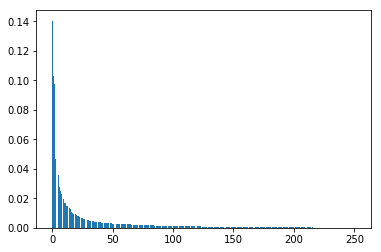

In [21]:
# Add plot
plt.bar(df_pca['features'], df_pca['variance'])
plt.show()

In [22]:
print(range(pca.n_components_), len(pca.explained_variance_))
print('First {} principle factors explains over 95% of the variance'.format(sum(df_pca.cumulated_variance > 0.95)))

range(0, 252) 252
First 129 principle factors explains over 95% of the variance


### Pipeline and Grid Search
In the new process, scaling is added as part of the modeling pipeline. Grid search is also used to find out the best parameters for the components of PCA and regularization of logistic regression. Finally, the model performance is tested with hold-out set.

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline

In [24]:
%%time

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('PCA', PCA()),
                     ('LogReg', LogisticRegression())])
n_components = np.arange(10, 150, 10)
c_space = np.logspace(-2, 2, 15)
parameters = {'PCA__n_components': n_components,
              'LogReg__C': c_space,
              'LogReg__penalty': ['l1', 'l2']}
cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)
print(cv.best_params_, cv.best_score_)

{'LogReg__penalty': 'l1', 'PCA__n_components': 20, 'LogReg__C': 0.13894954943731375} 0.847682119205
Wall time: 9min 41s


In [25]:
y_pred_prob = cv.predict_proba(X_test)[:,1]
print('Accuracy: {}\nAUC: {}'.format(cv.score(X_test, y_test), roc_auc_score(y_test, y_pred_prob)))

Accuracy: 0.8118811881188119
AUC: 0.8415384615384616


#### Same process without PCA

In [26]:
%%time

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('LogReg', LogisticRegression())])
c_space = np.logspace(-2, 2, 30)
parameters = {'LogReg__C': c_space,
              'LogReg__penalty': ['l1', 'l2']}
cv2 = GridSearchCV(pipeline, param_grid=parameters)
cv2.fit(X_train, y_train)
print(cv2.best_params_, cv2.best_score_)

{'LogReg__penalty': 'l1', 'LogReg__C': 0.32903445623126676} 0.814569536424
Wall time: 1min 2s


In [27]:
y_pred_prob2 = cv2.predict_proba(X_test)[:,1]
print('Accuracy: {}\nAUC: {}'.format(cv2.score(X_test, y_test), roc_auc_score(y_test, y_pred_prob2)))

Accuracy: 0.7425742574257426
AUC: 0.8348717948717949


## Model Performance

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

### ROC Curve

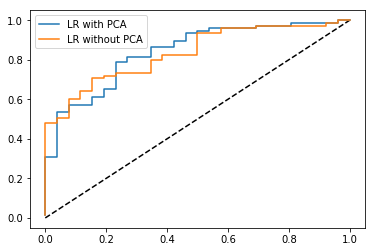

In [29]:
y_pred_prob = cv.predict_proba(X_test)[:,1]
y_pred_prob2 = cv2.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label = 'LR with PCA')
plt.plot(fpr2, tpr2, label = 'LR without PCA')
plt.legend()
plt.show()

### Classification Report

In [30]:
print("Logistic Regression with PCA")
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))
print('AUC: {}'.format(roc_auc_score(y_test, y_pred_prob)))

Logistic Regression with PCA
             precision    recall  f1-score   support

        0.0       0.65      0.58      0.61        26
        1.0       0.86      0.89      0.88        75

avg / total       0.81      0.81      0.81       101

AUC: 0.8415384615384616


In [31]:
print("Logistic Regression without PCA")
y_pred2 = cv2.predict(X_test)
print(classification_report(y_test, y_pred2))
print('AUC: {}'.format(roc_auc_score(y_test, y_pred_prob2)))

Logistic Regression without PCA
             precision    recall  f1-score   support

        0.0       0.50      0.50      0.50        26
        1.0       0.83      0.83      0.83        75

avg / total       0.74      0.74      0.74       101

AUC: 0.8348717948717949


## Appendix: kNN

In [32]:
%%time

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('PCA', PCA()),
                     ('kNN', KNeighborsClassifier())])
n_components = np.arange(10, 150, 10)
n_neighbors = np.arange(5, 15)
parameters = {'PCA__n_components': n_components,
              'kNN__n_neighbors': n_neighbors}
cv_knn = GridSearchCV(pipeline, param_grid=parameters)
cv_knn.fit(X_train, y_train)
print(cv_knn.best_params_, cv_knn.best_score_)

{'kNN__n_neighbors': 9, 'PCA__n_components': 10} 0.827814569536
Wall time: 3min 7s


In [34]:
y_pred_prob_knn = cv_knn.predict_proba(X_test)[:,1]
print('Accuracy: {}\nAUC: {}'.format(cv_knn.score(X_test, y_test), roc_auc_score(y_test, y_pred_prob_knn)))

Accuracy: 0.7821782178217822
AUC: 0.7223076923076923
